<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
<b>Общая цель проекта:</b><br>
    По историческим данным из открытых источников о продажах игр, оценке пользователей и экспертов,<br>
    жанрах и платформах нужно выявить закономерности определяющие успешность игры, для выявления потенциально<br>
    популярного продукта и состовления рекламной компании на 2017 год<br>
    <br>
<b>Бриф:</b><br>
    Загрузить и ознакомиться с данными, подготовить данные к анализу,<br>
    провести исследовательских анализ данных, составить портрет пользователей по регионам,<br>
    проверить гипотезы, написать общий вывод по сделанной работе<br>
    <br>
<b>Описание данных:</b><br>
    <b>Таблица с данными об играх:</b><br>
     Name — название игры<br>
     Platform — платформа<br>
     Year_of_Release — год выпуска<br>
     Genre — жанр игры<br>
     NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
     EU_sales — продажи в Европе (миллионы проданных копий)<br>
     JP_sales — продажи в Японии (миллионы проданных копий)<br>
     Other_sales — продажи в других странах (миллионы проданных копий)<br>
     Critic_Score — оценка критиков (максимум 100)<br>
     User_Score — оценка пользователей (максимум 10)<br>
     Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
    <br>
<b>План исследования:</b><br>
    1)Открыть файл с данными и изучить общую информацию<br>
    2)Сделать предобратобку данных<br>
    3)Провести исследовательских анализ данных<br>
    4)Составить портрет пользователя для каждого региона<br>
    5)Проверить гипотезы<br>
    6)Написать общий вывод<br>
   
</div>
    
    

<b>Иморт библиотек</b>

In [1]:
#Импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

<b>Загрузка данных</b>

In [2]:
#Загружаем данные из файла games.csv
games = pd.read_csv('/datasets/games.csv')
#Проверка загруженных данных
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<b>Общая информация о таблице</b>

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


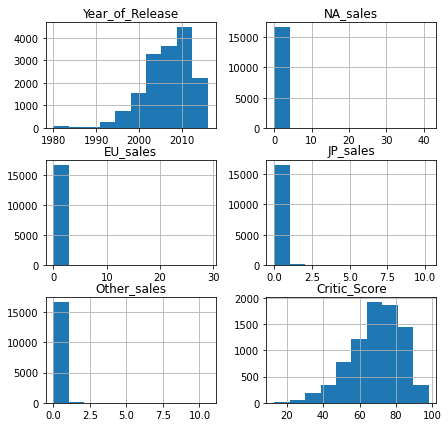

In [3]:
#Выводим общую информацию о таблице
display(games.head(10))
games.info()
games.hist(figsize = (7,7));
plt.show()

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
   Перед нами таблица с информацией об играх, на каких платформах они представлены, год выпуска, жанр игры,<br>
   продажи в регионах и других странах, оценка критиков и пользователей, а так же возрастной рейтинг.<br>
   В некоторых столбцах есть пропуски с которыми нужно разобраться,<br>
   также в некоторых столбцах неправильный тип данных, который надо будет изменить,<br>
   названия столбцов нужно будет привести к общему регистру,<br>
   в таблицах возможны дублированые строки, это нужно будет проверить.
</div>

<b>Предобработка данных</b>

Приводим названия столбцов к одному регистру

In [4]:
#Приводим названия столбцов к одному регистру
games.columns = [x.lower() for x in games.columns]
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Меняем тип данных в некоторых столбцах

In [5]:
#Меняем тип данных в некоторых столбцах
#Приводим столбец с датой выпуска к типу дата
games['year_of_release'] = pd.to_datetime(games['year_of_release'], format = "%Y")
#Приводим столбец с оценкой пользователей к типу число с плавающей запятой
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
#Проверка изменения типов
games.info()
games

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             16713 non-null  object        
 1   platform         16715 non-null  object        
 2   year_of_release  16446 non-null  datetime64[ns]
 3   genre            16713 non-null  object        
 4   na_sales         16715 non-null  float64       
 5   eu_sales         16715 non-null  float64       
 6   jp_sales         16715 non-null  float64       
 7   other_sales      16715 non-null  float64       
 8   critic_score     8137 non-null   float64       
 9   user_score       7590 non-null   float64       
 10  rating           9949 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Изменили тип данных в столбце с датой для лучшего понимания получаемых значений в дальнейшем исследовании<br>
    и изменили тип данных в столбце с с оценкой пользователя, для избежания возможных ошибок при рассчетах.
</div>

Проверяем наличие пропусков в таблице и считаем их количество

In [6]:
#Проверяем наличие пропусков в таблице и считаем их количество
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Обрабатываем найденные пропуски где это нужно и возможно

In [7]:
#Смотрим на пропуски в столбце с названием игры
games[games['name'].isna()]
#Находим индекс этих строк
games[games['name'].isna()].index
games = games.drop(659)
games = games.drop(14244)
#Проверяем удаление строк с пропуском
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

In [8]:
#Удаляем строки со значениями по дате релиза
x = games[games['year_of_release'].isna()].index
games = games.drop(x)
#Проверяем удаление нужных строк
games.isna().sum()
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    В нескольких столбцах были обнаружены пропуски, решено было удалить строки с пропусками в имени,<br>
    так в этих строках не содержалось почти никакой информации об игре и они не пригодятся в дальнейшем исследовании.<br>
    Строки где был пропущен год выпуска было решено удалить, так как заполнить их какими-то логическими значениями нельзя<br>
    и нам нужно прогнозировать выручку в 2017 году, такие пропуски будут мешать в дальнейшем анализе<br>
    и заполнить их какими-то логическими значениями нельзя
    В столбцах с оценками критиков и пользователей пропуски было решено оставить,<br>
    так как заполнение их медианой или средним значением по другим играм могло исказить данные.<br>
    В столбце с оценкой пользователей было значение "tbd", посмотрев информацию о нём в различных источниках,<br>
    я предположил, что оценка для данной игры ещё не была выставлена, а значит для нас в этом исследовании,<br>
    это значение можно принимать как пропуск, значение "tbd" стало значением NaN ещё при изменении типа данных столбца,<br>
    поэтому на данном этапе с ним не было проведено работы.<br>
    Две строки с большим количеством данных, скорее всего появились из-за неправильно загруженной информации.<br>
    Пропуски в годе релиза могли появиться из-за невнимательности во время добавления информации об игре,<br>
    или из-за невозможности найти достоверную информацию и дате релиза<br>
    Пропуски в рейтинге скорее всего связаны с тем что данную игру ещё не оценивали, но в каких-то случаях,<br>
    это может быть связано и с невнимательнотью во время заполнения информации.
</div>

Ищем полные дубликаты

In [9]:
#Поиск дубликатов и их количества в таблице
games.duplicated().sum()

0

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Дубликатов не было обнаружено
</div>

Добавляем столбец с продажами по всем регионам

In [10]:
#Создаём столбец с продажами по всем регионам
games['all_sales'] = (games['na_sales'] + 
                      games['eu_sales'] + 
                      games['jp_sales'] +
                      games['other_sales'])
#Проверяем созданный столбце
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989-01-01,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006-01-01,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006-01-01,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009-01-01,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984-01-01,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Создали дополнительный столбце с продажами по всем регионам, который может помочь в дальнейших исследованиях
    </div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    На этапе предобработки мы сделали:<br>
    1)Привели названия столбцов к одному регистру<br>
    2)Поменяли тип данных в столбцах с датой и оценкой пользователей<br>
    3)Обработали пропуски где это было нужно и возможно<br>
    4)Проверили таблицу на наличие дубликатов<br>
    5)Добавили столбец с продажами по всем регионам<br>
</div>

<b>Исследовательский анализ данных<b>

<b>Данные по количеству игр выпускаемых в разные и актуальные годы<b>

Text(0, 0.5, 'Количество продаж')

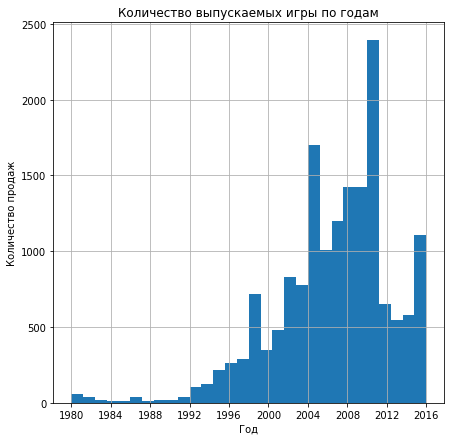

In [11]:
#Выведем количество игр выпускалось в разные годы
games['year_of_release'].hist(bins = 30, figsize = (7,7))
plt.title('Количество выпускаемых игры по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    На данном графике можно увидеть большой рост по количеству выпускаемых игр после 2000 года.<br>
    А также сильный спад начиная с 2011-2012 годов, но к 2016 ситуация с количеством игр на рынке начала стабилизироваться.<br>
    Есть несколько пиковых значений за эти периоды, которые в теории могут быть интересны в дальнейшем.
    </div>

Text(0, 0.5, 'Количество продаж')

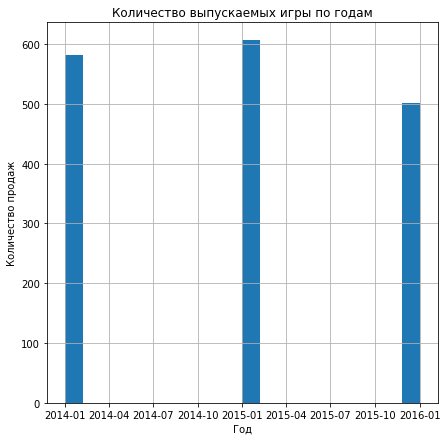

In [12]:
#Актуализируем данные и построим новую гистограмму только для актуальных лет
games_rel = games.query("year_of_release > 2013")
games_rel['year_of_release'].hist(bins = 20, figsize = (7,7))
plt.title('Количество выпускаемых игры по годам')
plt.xlabel('Год')
plt.ylabel('Количество продаж')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Данные за все периоды нам не понадобяться, для прогназирования продаж на следующий год<br>
    можно воспользоваться данными за последние 3 года, так как они скорее всего наиболее актуальны.
    </div>

<b>Построение графиков продаж для платформ с наибольшими продажами<b>

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006-01-01,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985-01-01,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008-01-01,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009-01-01,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006-01-01,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003-01-01,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


,all_sales
platform,
2600,86.48
3DO,0.10
3DS,257.81
DC,15.95
DS,802.78
GB,254.43
GBA,312.88
GC,196.73
GEN,28.35


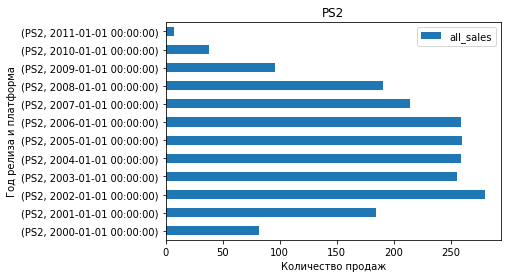

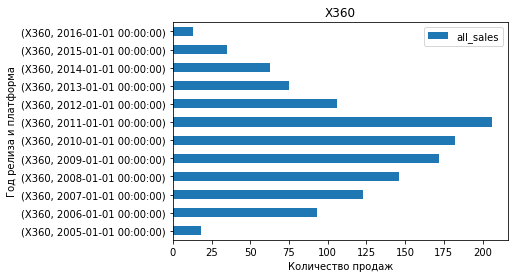

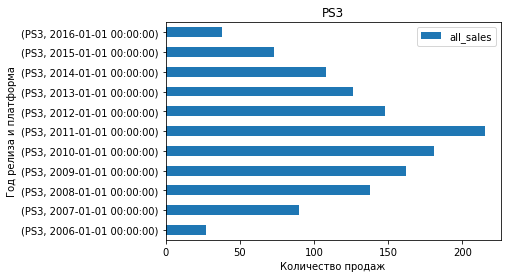

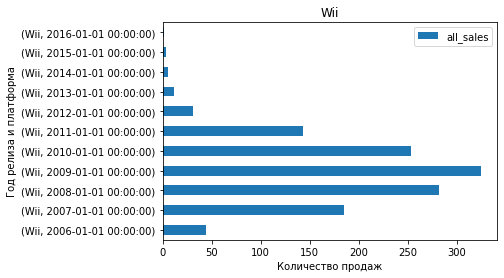

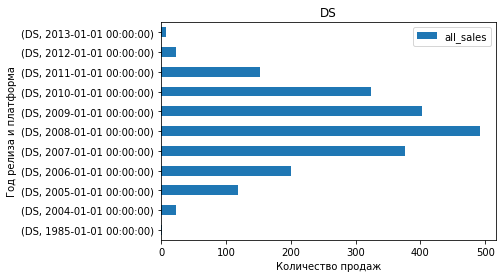

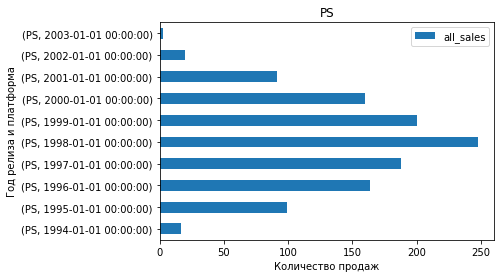

In [13]:
#Построим таблицу с наибольшими суммарными продажами
#Создаём таблицу с суммарными продажами по платформам
top_sales = games.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
display(games)
display(top_sales)
#Сортируем полученную таблицу по убыванию продаж
top_sales = top_sales.sort_values(by = 'all_sales', ascending = False)
top6_plat = top_sales.head(6).index
#Строим график изменений продаж по самым популярным платформам
for x in top6_plat:
    (games.pivot_table(index=['platform', 'year_of_release'],
                       values='all_sales',
                       aggfunc='count').query('platform == @x').plot(kind='barh', title=x)
    )
    plt.xlabel('Количество продаж')
    plt.ylabel('Год релиза и платформа')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    По выведенным гистограммам можно сказать что платформы растут,<br>
    а затем теряют свою популярность примерно за 6 лет(3 года роста и 3 года спада), это подтверждает предположение<br>
    об актуальности данных только за последние 3 года.
</div>

<b>Построение таблиц с данными о продажах по платформам за последние 3 года<b>

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


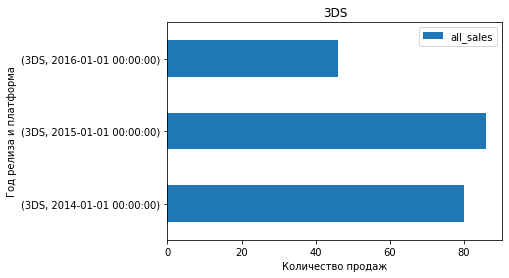

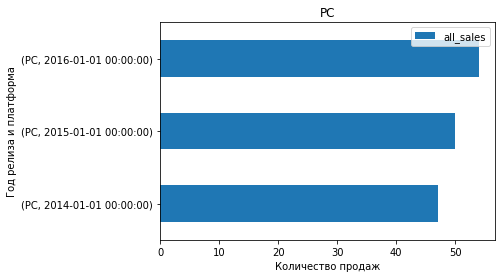

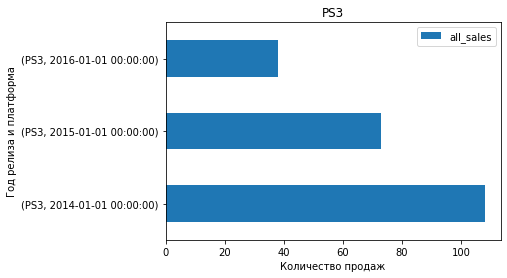

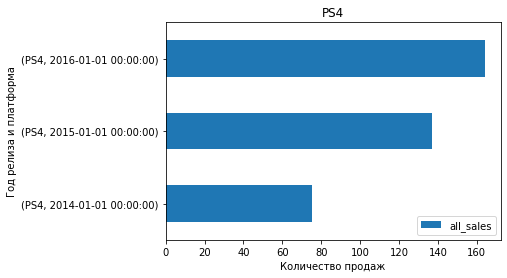

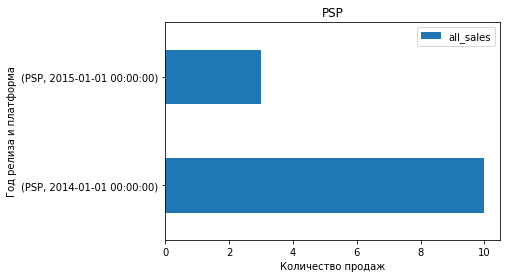

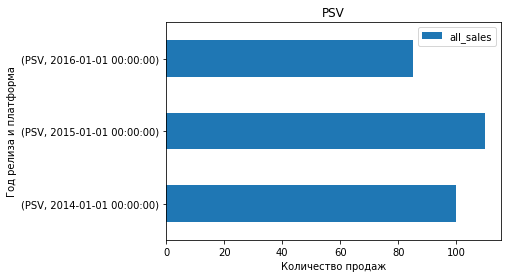

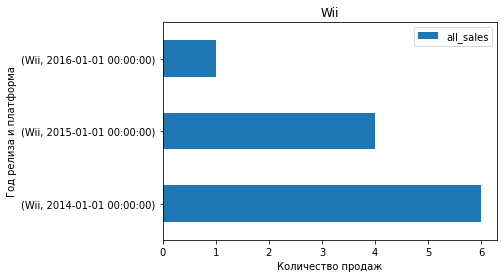

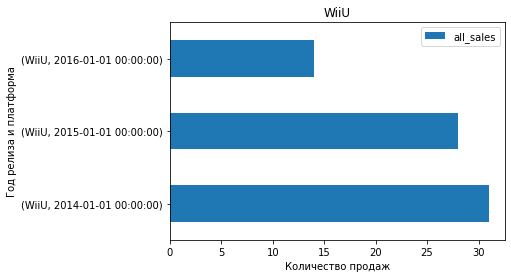

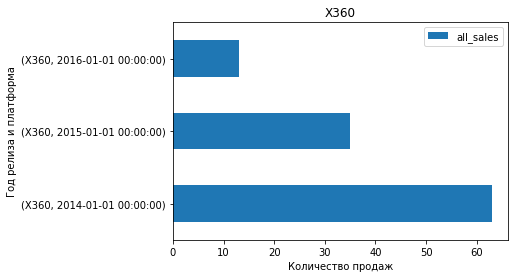

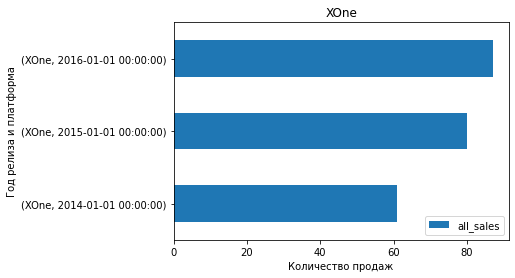

In [14]:
#Построим таблицу с данными о продажах за последние три года
top_sales_rel = games_rel.pivot_table(index = 'platform', values = 'all_sales', aggfunc = 'sum')
display(top_sales_rel.sort_values(by = 'all_sales', ascending = False))
#Построим графики с продажами для этих таблиц
rel_index = top_sales_rel.index
for x in rel_index:
    games_rel.pivot_table(index=['platform', 'year_of_release'],
                       values='all_sales',
                       aggfunc='count').query('platform == @x').plot(kind='barh', title=x)
    plt.xlabel('Количество продаж')
    plt.ylabel('Год релиза и платформа')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    После построенных графиков можно выделить 3 потенциально прибыльных платформы, так как сейчас они находятся в зоне роста и их продажи растут, это - XOne, PS4, PC.
    </div>

<b>Построение графика "ящик с усами" по глобальным продажам игр в разбивке по популярным платформам<b>

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015-01-01,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014-01-01,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014-01-01,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015-01-01,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015-01-01,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014-01-01,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016-01-01,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016-01-01,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Text(0, 0.5, 'Платформа')

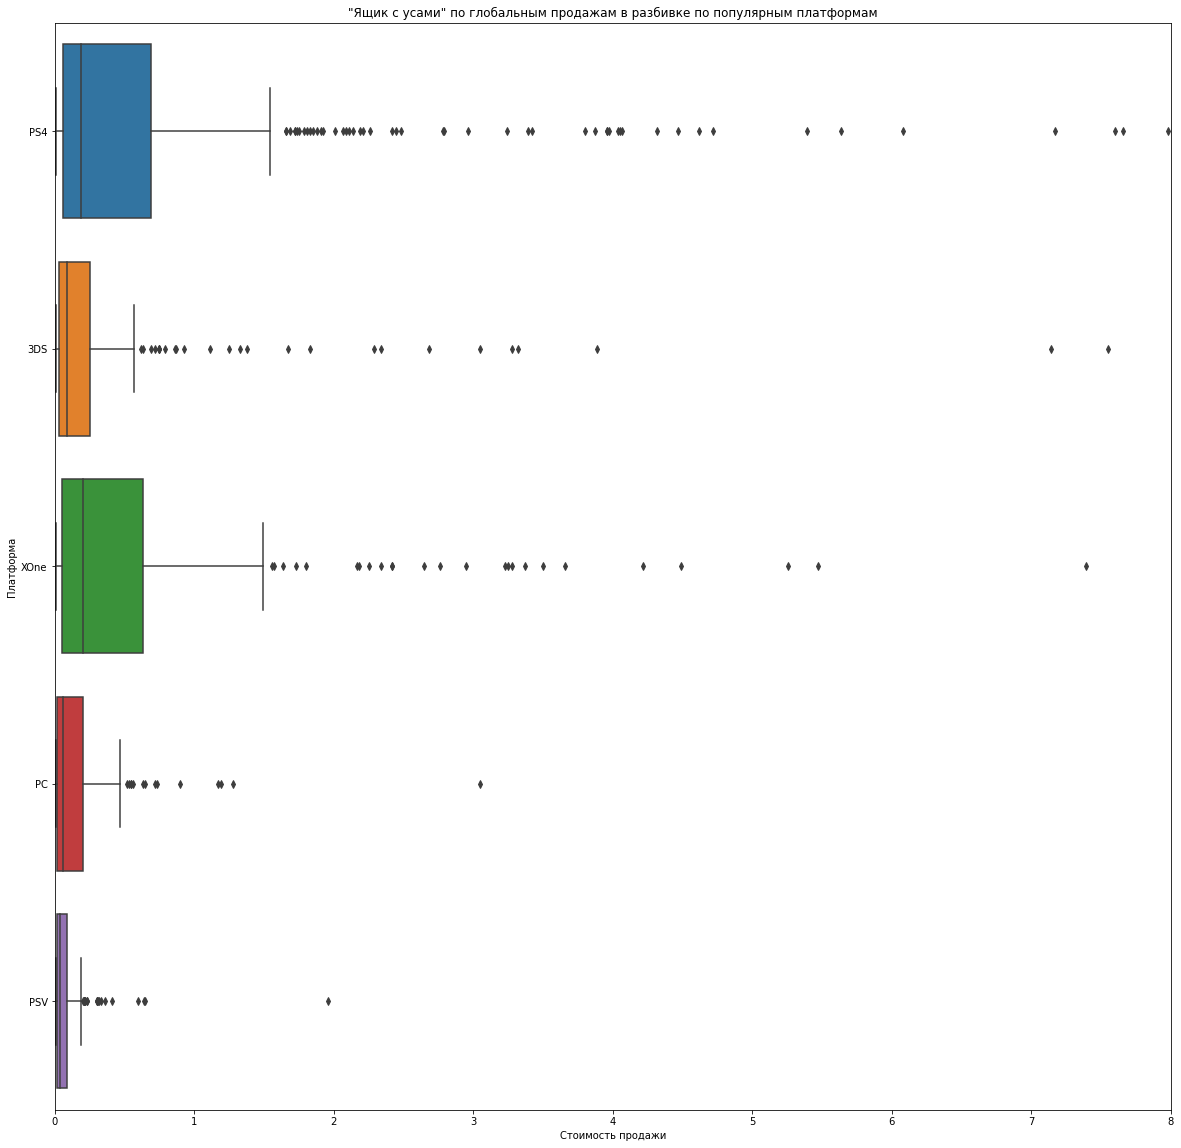

In [15]:
display(games_rel)
#Построим график "ящик с усами" по глобальным продажам в разбивке по популярным платформам
plt.figure(figsize=(20, 20))
sns.boxplot(y = games_rel.query('platform == ["XOne","PS4","PC","PSV","3DS"]')['platform'], x=games_rel['all_sales'])
plt.xlim(0,8)
plt.title('"Ящик с усами" по глобальным продажам в разбивке по популярным платформам')
plt.xlabel('Стоимость продажи')
plt.ylabel('Платформа')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    У каждой популярной платформы есть выбивающиеся от нормы значения, скорее всего этими точками обозначены самые популярные проекты,<br>
    которые поддерживаются данной платформой, на них следует обратить внимание при построении прогноза на 2017 год.
    </div>

<b>Построения графика рассеивания по продажам и отзывам критиков и пользователей для самой популярной платформы<br>
А так же расчет корреляции между отзывами и продажами<b>

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Самая популярная платформа: PS4
Корреляция между отзывами критиков и продажами на платформе PS4 равняется: 0.328105086966363


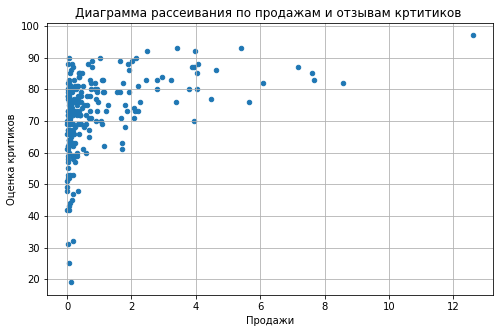

In [16]:
#Построим график рассеивания по продажам и отзывам кртитиков и пользователей для самой популярной платформы
#Найдём платформу с самыми большими продажами за актуальный период
top_sales_rel = top_sales_rel.sort_values(by = 'all_sales', ascending = False)
display(top_sales_rel)
print("Самая популярная платформа: PS4")
#Построим график рассеивания по продажам и отзывам кртитиков для этой платформы
games_rel.query('platform == "PS4"').plot(x='all_sales',
                                          y='critic_score',
                                          kind='scatter',
                                          alpha=1,
                                          figsize=(8, 5),
                                          sharex=False, grid=True)
plt.title('Диаграмма рассеивания по продажам и отзывам кртитиков ')
plt.ylabel('Оценка критиков')
plt.xlabel('Продажи')
#Считаем корреляцию между отзывами критиков и продажами на этой платформе
print('Корреляция между отзывами критиков и продажами на платформе PS4 равняется:',
      games_rel['critic_score'].corr(games_rel['all_sales']))

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Коэффициент корреляции близок к 0, а значит, что связь между продажами и оценками критиков низкая,<br>
    что в целом видно и на графике, игр с большой оценкой и большими продажами не так много и они выбиваються из остальных значений
    </div>

Корреляция между отзывами пользователей и продажами на платформе PS4 равняется: -0.013070305002484585


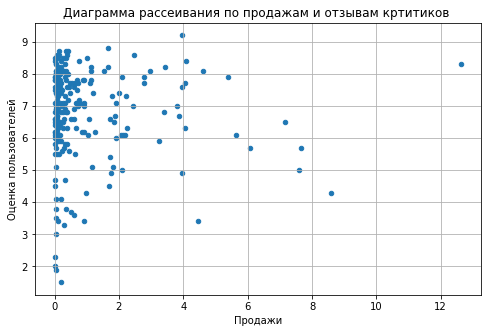

In [17]:
#Построим график рассеивания по продажам и отзывам пользователей для этой платформы
games_rel.query('platform == "PS4"').plot(x='all_sales',
                                          y='user_score',
                                          kind='scatter',
                                          alpha=1,
                                          figsize=(8, 5),
                                          sharex=False, grid=True)
plt.title('Диаграмма рассеивания по продажам и отзывам кртитиков ')
plt.ylabel('Оценка пользователей')
plt.xlabel('Продажи')
#Считаем корреляцию между отзывами пользователей и продажами на этой платформе
print('Корреляция между отзывами пользователей и продажами на платформе PS4 равняется:',
      games_rel['user_score'].corr(games_rel['all_sales']))

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Коэффициент корреляции почти равен 0, а значит, что связи между продажами и оценками пользователей почти нет<br>
    что в целом видно и на графике, точки соотношения продаж и оценки могут распределятся абсолютно хаотично,<br>
    из этого можно сделать вывод, что в данном случае не стоит смотреть на оценки пользователей при прогнозировании
    </div>

<b>Построения графика рассеивания по продажам и отзывам критиков и пользователей для всех остальных платформ<br>
А так же расчет корреляции между отзывами и продажами<b>

Корреляция между отзывами критиков и продажами на данной платформе 3DS  равняется: 0.314117492869051
Корреляция между отзывами критиков и продажами на данной платформе XOne  равняется: 0.42867694370333226
Корреляция между отзывами критиков и продажами на данной платформе WiiU  равняется: 0.370201412480884
Корреляция между отзывами критиков и продажами на данной платформе PS3  равняется: 0.44657460493190704
Корреляция между отзывами критиков и продажами на данной платформе X360  равняется: 0.5257228356581523
Корреляция между отзывами критиков и продажами на данной платформе PC  равняется: 0.17463413769350036
Корреляция между отзывами критиков и продажами на данной платформе Wii  равняется: nan
Корреляция между отзывами критиков и продажами на данной платформе PSV  равняется: 0.04266490657009526
Корреляция между отзывами критиков и продажами на данной платформе PSP  равняется: nan


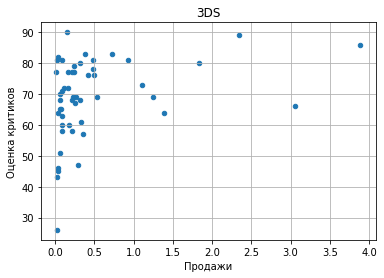

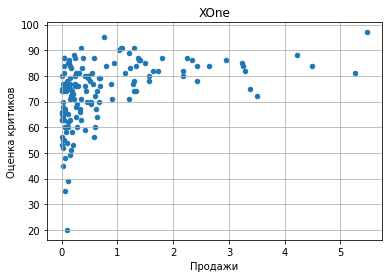

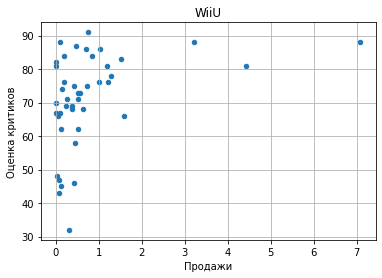

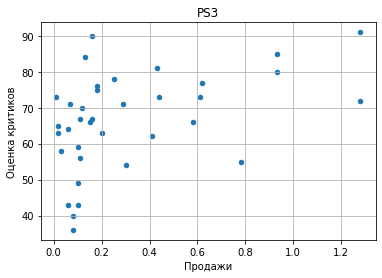

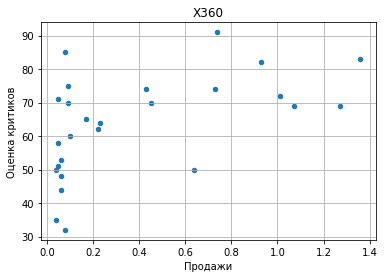

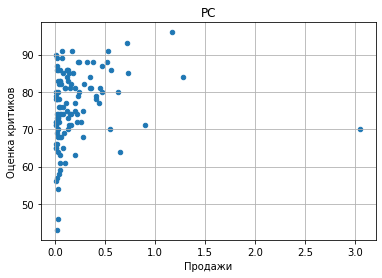

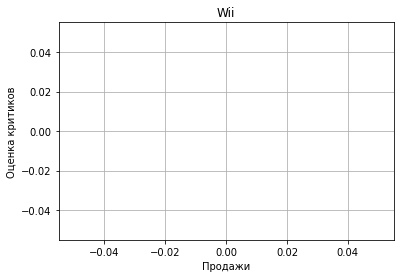

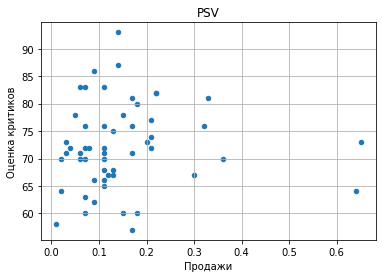

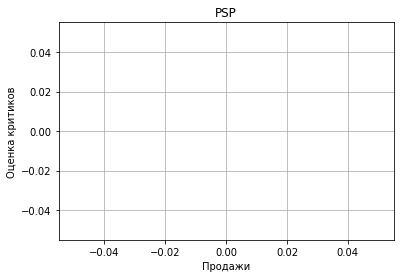

In [18]:
#Построим график рассеивания по продажам и отзывам критиков для остальных платформ
for i in games_rel.query('platform != "PS4"')['platform'].unique():
    games_rel.query('platform == @i').plot(x='all_sales',
                   y='critic_score',
                   kind='scatter',
                   alpha=1,
                   sharex=False, grid=True, title=i)
    plt.xlabel('Продажи')
    plt.ylabel('Оценка критиков')
    print('Корреляция между отзывами критиков и продажами на данной платформе', i ,' равняется:',
    games_rel.query('platform == @i')['critic_score'].corr(games_rel.query('platform == @i')['all_sales']))

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    На графиках двух платформ нет значений, это - Wii и PSP, корреляция для них равняется 1 и nan соответственно.<br>
    Данные платформы мы не будет учитывать, так как на первой скорее всего есть только одно значение продажи,<br>
    а на другой пропущены значения оценки игры.<br>
    На остальных графиках видно небольшую зависимость между оценками критиков и продажами,<br>
    но коэффициент корреляции не достаточно высок, чтобы брать это в работу для прогнозирования.<br>
</div>

Корреляция между отзывами пользователей и продажами на данной платформе 3DS  равняется: 0.2151932718527028
Корреляция между отзывами пользователей и продажами на данной платформе XOne  равняется: -0.0703839280647581
Корреляция между отзывами пользователей и продажами на данной платформе WiiU  равняется: 0.40792645792170773
Корреляция между отзывами пользователей и продажами на данной платформе PS3  равняется: -0.16676141347662118
Корреляция между отзывами пользователей и продажами на данной платформе X360  равняется: -0.138444570945665
Корреляция между отзывами пользователей и продажами на данной платформе PC  равняется: -0.07159665703472451
Корреляция между отзывами пользователей и продажами на данной платформе Wii  равняется: 1.0
Корреляция между отзывами пользователей и продажами на данной платформе PSV  равняется: -0.16845504978064446
Корреляция между отзывами пользователей и продажами на данной платформе PSP  равняется: nan


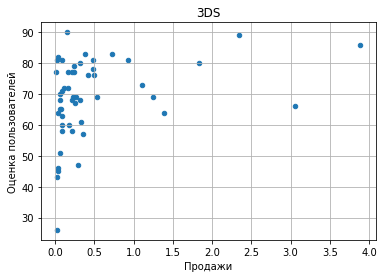

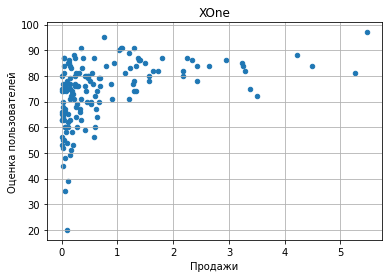

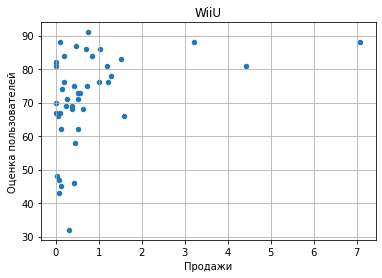

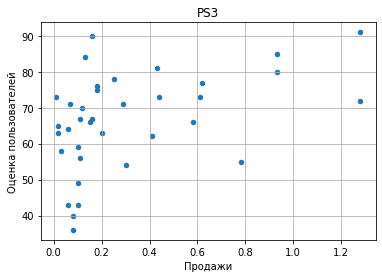

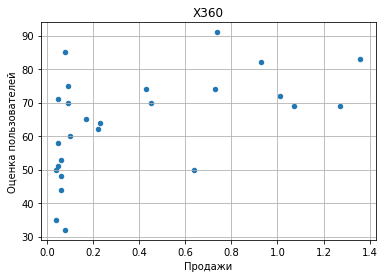

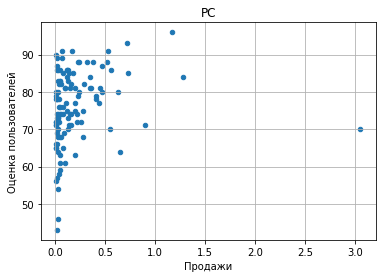

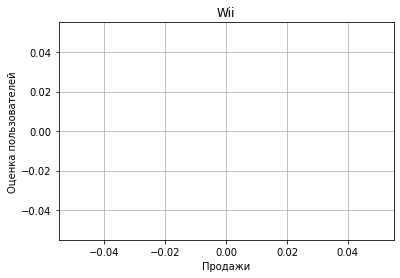

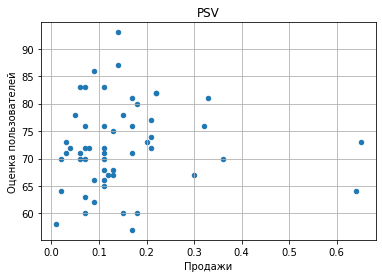

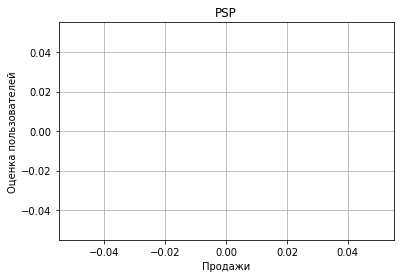

In [19]:
#Построим график рассеивания по продажам и отзывам пользователей для остальных платформ
for i in games_rel.query('platform != "PS4"')['platform'].unique():
    games_rel.query('platform == @i').plot(x='all_sales',
                   y='critic_score',
                   kind='scatter',
                   alpha=1,
                   sharex=False, grid=True, title=i)
    plt.xlabel('Продажи')
    plt.ylabel('Оценка пользователей')
    print('Корреляция между отзывами пользователей и продажами на данной платформе', i ,' равняется:',
    games_rel.query('platform == @i')['user_score'].corr(games_rel.query('platform == @i')['all_sales']))

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Ситуация с зависимостью оценок пользователей и продаж очень похожа на предыдущий вывод<br>
    о связи оценок критиков и продажах, но в данном случае коэффициент корреляции ещё ниже.
</div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    После вывода графиков и подсчета корреляции по всем платформам актуального периода,<br>
    можно сделать вывод о том, что в большинстве случаев продажи никак не связаны с оценками критиков или пользователей,<br>
    поэтому не следует опираться на это при дальнейшем прогнозировании
    </div>

<b>Построение графика с продажами по жанрам<b>

Text(0, 0.5, 'Продажи')

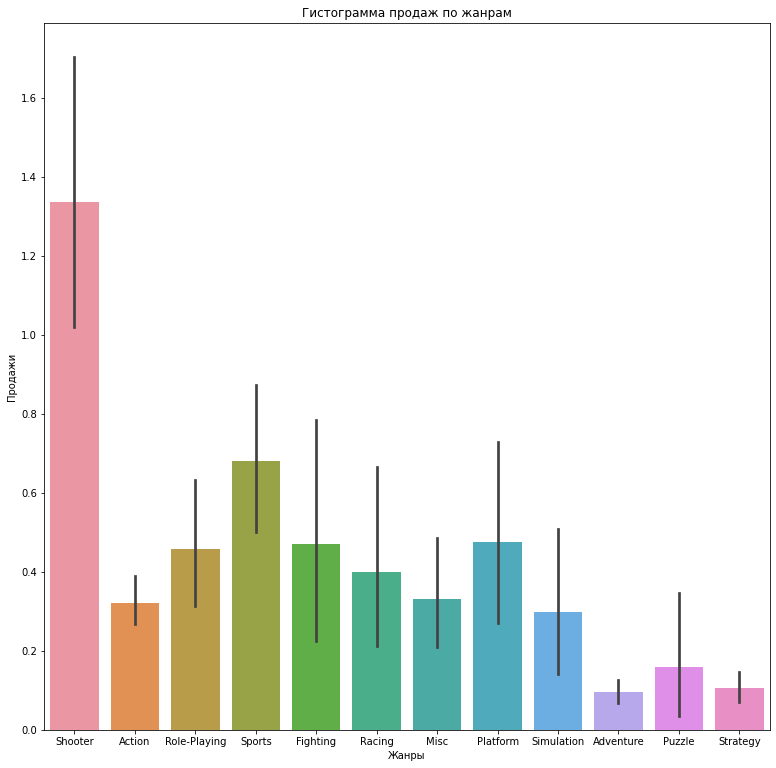

In [20]:
#Строим график с продажами по жанрам
plt.figure(figsize = (13,13))
sns.barplot(data=games_rel, x="genre", y="all_sales")
plt.title('Гистограмма продаж по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    На данной таблице видно, что самым прибыльным жанром являетя Шутер, за ним следует жанр Спортивных игр<br>
    также достаточно хороший показатель продаж имеют жанры Ролевых игры, Файтингов и Платформеров.<br>
    Самые прибыльные жанры - Шутеры и Спортивные игры, они достаточно сильно выбиваються от остальных значений<br>
    Также сильно выбиваються жанры с низкими продажами, это Приключения, Стратегии и Головоломки.<br>
    На графике так же есть полосы с "ошибочными" значениями, скорее всего в данном случае это исключения из правил<br>
    для каждого конкретного жанра, например самая популярная игра в данном жанре с лучшими продажами.
    </div>

<b>Построение графиков с самыми популярными платформами и жанрами по регионам NA, EU, JP.<br>
   А так же влияние возрастного рейтинга на продажи в этих регионах<b>

<b>Строим круговые диаграммы по продажам на популярных платформах для каждого региона<b>

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

Text(0.5, 1.0, 'Продажи топ-5 платформ в регионе NA')

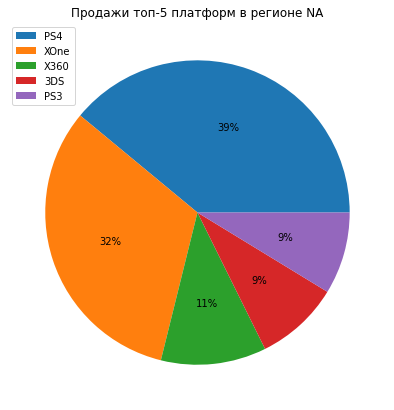

In [21]:
#Построим круговую диаграмму по продажам на популярных платформах для региона NA
na_top_sales_plat = games_rel.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
display(na_top_sales_plat)
plt.figure(figsize = (7,7))
plt.pie(na_top_sales_plat, autopct='%1.0f%%')
plt.legend(['PS4','XOne','X360','3DS','PS3'])
plt.title('Продажи топ-5 платформ в регионе NA')

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

Text(0.5, 1.0, 'Продажи топ-5 платформ в регионе EU')

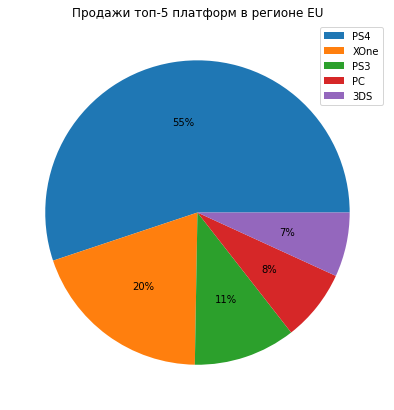

In [22]:
#Построим круговую диаграмму для региона EU
eu_top_sales_plat = games_rel.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
display(eu_top_sales_plat)
plt.figure(figsize = (7,7))
plt.pie(eu_top_sales_plat, autopct='%1.0f%%')
plt.legend(['PS4','XOne','PS3','PC','3DS'])
plt.title('Продажи топ-5 платформ в регионе EU')

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

Text(0.5, 1.0, 'Продажи топ-5 платформ в регионе JP')

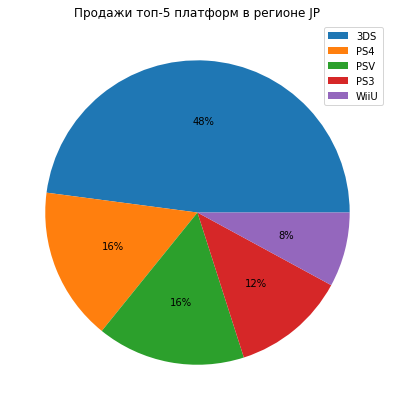

In [23]:
#Построим круговую диаграмму для региона JP
jp_top_sales_plat = games_rel.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
display(jp_top_sales_plat)
plt.figure(figsize = (7,7))
plt.pie(jp_top_sales_plat, autopct='%1.0f%%')
plt.legend(['3DS','PS4','PSV','PS3','WiiU'])
plt.title('Продажи топ-5 платформ в регионе JP')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Как видно на представленных графиках, в каждом регионе есть свои фавориты среди различных платформ,<br>
    Скорее всего это связанно с доступностью платформ для каждого региона, а также с предпочтениями пользователей,<br>
    так как для каждой платформы есть свои "эксклюзивные" игры, выпускаемые только для одной платформы,<br>
    которые могут пользоваться разной популярностью в разных регионах
    </div>

<b>Строим круговые диаграммы по популярным жанрам для каждого региона<b>

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

Text(0.5, 1.0, 'Продажи топ-5 жанров в регионе NA')

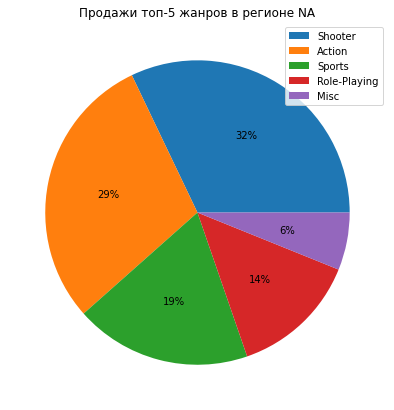

In [24]:
#Строим круговую диаграммы по популярным жанрам для региона NA
na_top_sales_genre = games_rel.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
display(na_top_sales_genre)
plt.figure(figsize = (7,7))
plt.pie(na_top_sales_genre, autopct='%1.0f%%')
plt.legend(['Shooter','Action','Sports','Role-Playing','Misc'])
plt.title('Продажи топ-5 жанров в регионе NA')

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

Text(0.5, 1.0, 'Продажи топ-5 жанров в регионе EU')

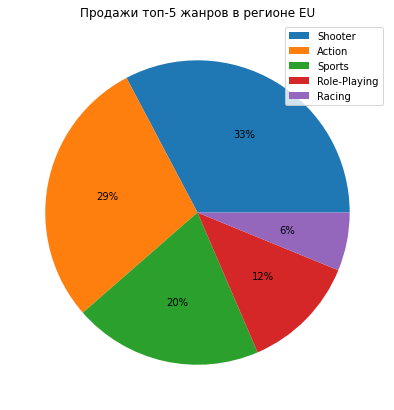

In [25]:
#Строим круговую диаграммы по популярным жанрам для региона EU
eu_top_sales_genre = games_rel.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
display(eu_top_sales_genre)
plt.figure(figsize = (7,7))
plt.pie(eu_top_sales_genre, autopct='%1.0f%%')
plt.legend(['Shooter','Action','Sports','Role-Playing','Racing'])
plt.title('Продажи топ-5 жанров в регионе EU')

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

Text(0.5, 1.0, 'Продажи топ-5 жанров в регионе JP')

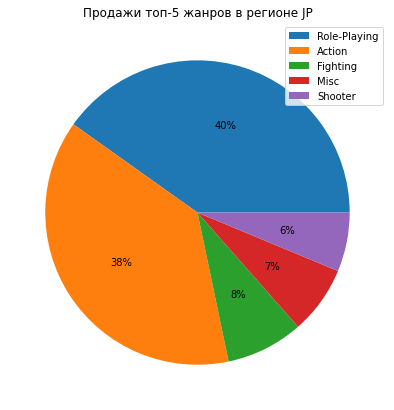

In [26]:
#Строим круговую диаграммы по популярным жанрам для региона JP
jp_top_sales_genre = games_rel.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
display(jp_top_sales_genre)
plt.figure(figsize = (7,7))
plt.pie(jp_top_sales_genre, autopct='%1.0f%%')
plt.legend(['Role-Playing','Action','Fighting','Misc','Shooter'])
plt.title('Продажи топ-5 жанров в регионе JP')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    В регионах EU и NA приоритетные жанры схожи, скорее всего пользователям в этих регионах нравятся<br>
    примерно одни и те же игры. В то время как в регионе JP ситуация совсем не похожа на другие два региона.<br>
    Скорее всего это связано с различными или наоборот схожими менталитетами и предпочтениями пользователей в разных регионах
    </div>

<b>Строим круговые диаграммы продаж по возрастным рейтингам для каждого региона<b>

rating
M       96.42
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

Text(0.5, 1.0, 'Продажи по возрастным рейтингам в регионе NA')

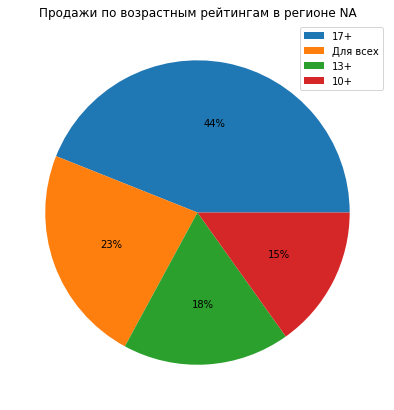

In [27]:
#Посмотрим на значения рейтинга
games_rel['rating'].unique()
#Строим круговую диаграмму по продажам игр с разными возрастными рейтингами в регионе NA
na_top_sales_age_rate = games_rel.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
display(na_top_sales_age_rate)
plt.figure(figsize = (7,7))
plt.pie(na_top_sales_age_rate, autopct='%1.0f%%')
#Обозначим каждый рейтинг конкретным возрастом для лучшего понимания, конвертировав по информации из интернета
plt.legend(['17+','Для всех','13+','10+'])
plt.title('Продажи по возрастным рейтингам в регионе NA')

rating
M       93.44
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

Text(0.5, 1.0, 'Продажи по возрастным рейтингам в регионе EU')

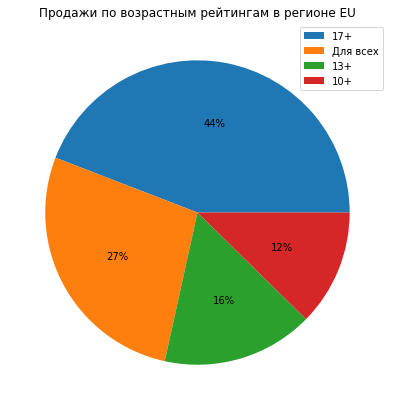

In [28]:
#Строим круговую диаграмму по продажам игр с разными возрастными рейтингами в регионе EU
eu_top_sales_age_rate = games_rel.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
display(eu_top_sales_age_rate)
plt.figure(figsize = (7,7))
plt.pie(eu_top_sales_age_rate, autopct='%1.0f%%')
#Обозначим каждый рейтинг конкретным возрастом для лучшего понимания, конвертировав по информации из интернета
plt.legend(['17+','Для всех','13+','10+'])
plt.title('Продажи по возрастным рейтингам в регионе EU')

rating
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

Text(0.5, 1.0, 'Продажи по возрастным рейтингам в регионе JP')

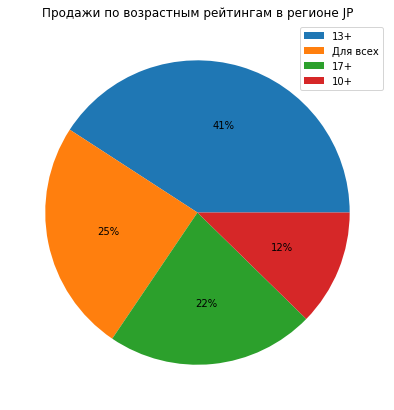

In [29]:
#Строим круговую диаграмму по продажам игр с разными возрастными рейтингами в регионе JP
jp_top_sales_age_rate = games_rel.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
display(jp_top_sales_age_rate)
plt.figure(figsize = (7,7))
plt.pie(jp_top_sales_age_rate, autopct='%1.0f%%')
#Обозначим каждый рейтинг конкретным возрастом для лучшего понимания, конвертировав по информации из интернета
plt.legend(['13+','Для всех','17+','10+'])
plt.title('Продажи по возрастным рейтингам в регионе JP')

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Ситуация похожа на ситуцию с жанрами, в регионах EU и NA значения примерно схожи и отличаются от региона JP<br>
    Скорее всего это связанно с внутренними правилами и законами, а также менталитетом для каждого региона.
    </div>

<b>Проверка гипотез<b>

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые<br>
Альтернативная гипотеза: Срдений пользовательских рейтинг одной из двух платформ больше

In [30]:
#Сделаем выборку по пользовательским рейтингам каждой из платформ
plat_xone = games_rel.query('platform == "XOne"')['user_score']
plat_pc = games_rel.query('platform == "PC"')['user_score']

#Задаем уровень статистической значимости
alpha = 0.05

#Проводим тестирование
results = st.ttest_ind(plat_xone, plat_pc, alternative = 'greater', nan_policy = 'omit')
print('p-результат', results.pvalue)

#Сравниваем результат тестирования с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
#Вывод средних значений пользовательского рейтинга для каждой платформы
print('Среднее значение пользовательского рейтинга для платформы Xbox One:', plat_xone.mean())
print('Среднее значение пользовательского рейтинга для платформы PC:', plat_pc.mean())

p-результат 0.052252539596742566
Не получилось отвергнуть нулевую гипотезу
Среднее значение пользовательского рейтинга для платформы Xbox One: 6.594545454545454
Среднее значение пользовательского рейтинга для платформы PC: 6.298360655737704


<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    После тестирования мы приняли нулеваю гипотезу , средние значение пользовательского рейтинга, для каждой платформы<br>
    не сильно отличается и лежит близко к 6.5.<br>
    А значит можно предположить, средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые 
    </div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Нулевая гипотеза в данном случае была сформирована из данных о популярных платформах,<br>
    так как обе платформы входят в топ-5 популярных платформ регионов NA и EU,<br>
    а как мы предположили в этих регионах у пользователей одинаковые предпочтения в играх,<br>
    то из этого можно было предположить, что и пользовательские рейтинги у платформ одинаковые.<br>
    Альтернативная гипотеза было построена опираясь на нулевую, если бы средний пользовательских рейтинг был разным,<br>
    то значит у одной из платформ он был бы больше.
    </div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Был выбран метод ttest_ind, так как он хорошо подходит для проверки средних значений двух генеральных совокупностей<br>
    так же для него был написан параметр alternative = 'greater',<br>
    чтобы в случае неравенста средних оценок можно было понять для какой из платформ действует альтернативная гипотеза
    </div>

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые<br>
Альтернативная гипотеза: Средние пользовательские рейтинги одного из жанров Action и Sports больше

In [31]:
#Сделаем выборку по пользовательским рейтингам каждого из жанров
genre_action = games_rel.query('genre == "Action"')['user_score']
genre_sports = games_rel.query('genre == "Sports"')['user_score']

#Задаем уровень статистической значимости
alpha = 0.05

#Проводим тестирование
results = st.ttest_ind(genre_action, genre_sports, alternative = 'greater', nan_policy = 'omit')
print('p-результат', results.pvalue)

#Сравниваем результат тестирования с уровнем статистической значимости
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')
    
#Выведем среднее значение каждой из выборок
print('Средний пользовательский рейтинг жанра action:', genre_action.mean())
print('Средний пользовательский рейтинг жанра sports:', genre_sports.mean())

p-результат 1.4355573992553652e-19
Отвергаем нулевую гипотезу
Средний пользовательский рейтинг жанра action: 6.760606060606061
Средний пользовательский рейтинг жанра sports: 5.225196850393701


<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    После проведённого тестирования нулевая гипотеза была отвергнута. По выведенным средним значениям каждой из выборок<br>
    можно предположить, что средний пользовательский рейтинг жанра action больше чем у жанра sports почти на 1.5 балла.
    </div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Нулевая гипотеза была сформирована из графиков выведенных ранее,<br>
    на них оба жанра встречаются в популярных жанрах каждого региона из этого можно было предположить,<br>
    что и пользовательские рейтинги у платформ одинаковые.<br>
    Альтернативная гипотеза было построена опираясь на нулевую, если бы средний пользовательских рейтинг был разным,<br>
    то значит у одной из платформ он был бы больше.
</div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    Был выбран метод ttest_ind, так как он хорошо подходит для проверки средних значений двух генеральных совокупностей<br>
    так же для него был написан параметр alternative = 'greater',<br>
    чтобы в случае неравенста средних оценок можно было понять для какой из платформ действует альтернативная гипотеза
    </div>

<div style = "background:NavajoWhite;padding: 20px; border-radius: 10px">
    <b>Общий вывод:</b><br>
        <b>1)</b>После проведённых исследований актуальными данными можно считать, данные за последние 3 года<br>
    <br>
        <b>2)</b>После анализа актуальных данных, можно выделить 3 потенциально прибыльные платформы, это: Xbox One, PS4 и PC<br>
    <br>
        <b>3)</b>На каждой из платформ есть проекты приносящие наибольшую прибль, их значения по продажам сильно отличаются от средних, на эти проекты следует обратить внимание при дальнейшем прогнозировании<br>
    <br>
        <b>4)</b>После вывода графиков и подсчета корреляции по всем платформам актуального периода,<br>
    можно сделать вывод о том, что в большинстве случаев продажи никак не связаны с оценками критиков или пользователей,<br>
    поэтому не следует опираться на это при дальнейшем прогнозировании<br>
    <br>
        <b>5)</b>По результатам исследований выявлено, что самым прибыльным жанром являетя Шутер, за ним следует жанр Спортивных игр<br>
    также достаточно хороший показатель продаж имеют жанры Ролевых игры, Файтингов и Платформеров.<br>
    <br>
    <b>6)</b>После построения графика по продажам игр для популярных платформ выяснилось что,<br>
    в каждом регионе есть свои фавориты среди различных платформ.<br>
    Скорее всего это связанно с доступностью платформ для каждого региона, а также с предпочтениями пользователей,<br>
    так как для каждой платформы есть свои "эксклюзивные" игры, выпускаемые только для одной платформы,<br>
    которые могут пользоваться разной популярностью в разных регионах.<br>
    Также можно выделить платформу PS4, она пользуется хорошей популярностью в каждом регионе.<br>
    Самой популярной платформой в регионе NA является: PS4. Также очень близка по значениям к ней: XboxOne<br>
    Самой популярной платформой в регионе EU является: PS4. Она сильно выбивается вперёд среди всех популярных платформ<br>
    Самой популярной платформой в регионе JP является: 3DS.<br>
    <br>
    <b>7)</b>В регионах EU и NA приоритетные жанры схожи, скорее всего пользователям в этих регионах нравятся<br>
    примерно одни и те же игры. В то время как в регионе JP ситуация совсем не похожа на другие два региона.<br>
    Скорее всего это связано с различными или наоборот схожими менталитетами и предпочтениями пользователей в разных регионах.<br>
    В регионах EU и NA большим спросом пользуются жанры Shooter, Action, Sports и Role-Playing(в порядке убывания).<br>
    В регионе JP любимые жанры пользователей Role-Playing, Action, Fighting, Misc и Shooter(в порядке убывания).<br>
    <br>
    <b>8)</b>Ситуация с продажами по возрастным рейтингам схожа, в регионах EU и NA значения примерно схожи и отличаются от региона JP<br>
    Скорее всего это связанно с внутренними правилами и законами, а также менталитетом для каждого региона.<br>
    В регионах EU и NA большим спросом пользуются игры с возрастным рейтингом 17+(M), Для всех(E), 13+(T), 10+(E 10+)(в порядке убывания).<br>
    В регионе JP большим спросом пользуются игры с возрастным рейтингом 13+(T), Для всех(E), 17+(M), 10+(E 10+)(в порядке убывания).<br>
    <br>
    <b>9)</b>После тестирования гипотеза о том что средние пользовательские рейтинги жанров Action и Sports одинаковые  подтвердилась,<br> средние значение пользовательского рейтинга, для каждой платформы не сильно отличается и лежит близко к 6.5.<br>
    А значит можно сказать что, средние пользовательские рейтинги платформ Xbox One и PC примерно одинаковые<br>
    <br>
    <b>10)</b>После тестирования гипотеза о том, что Средние пользовательские рейтинги жанров Action и Sports одинаковые не подтвердилась.<br>
    По выведенным средним значениям каждой из выборок можно сказать, что средний пользовательский рейтинг жанра action больше чем у жанра sports почти на 1.5 балла.
  </div>